#### Author: Vincent Yeo

#### Background
Bushfires are [common](https://www.bbc.com/news/world-australia-50951043) in Australia during dry season. However, in [2019](https://www.theguardian.com/australia-news/2019/dec/25/factcheck-why-australias-monster-2019-bushfires-are-unprecedented), due to record-low rainfalls in the previous months, that bushfires has increased continent-wide, having burnt throught more than 5m hectares leading to emergency. For lastest bushfires location, Australia Government has offered a website [here](https://myfirewatch.landgate.wa.gov.au/).

Weather forecasting has demonstrated to be an important application in monitoring our environment and predicting potential weather disaster beforehand. For example, with historical weather data, we can predict the next critical periods whereby the low rainfall level are likely to increase the chance of bushfires occurences happening. This can better assist government decision in allocating resources before potential weather-caused crisis can happen. 

Canberra is Australia's capital city at the southeast of the continent. Here is an example of the [Weather map of Canberra](https://www.meteoblue.com/en/weather-maps/canberra_australia_2172517?variable=precipitation3h_cloudcover_pressure&level=surface&lines=none&mapcenter=-35.3481N148.9110&zoom=10)


### Weather dataset

This is a public weather dataset adapted from:
[Ledolter, J. (May 2013). Data Mining and Business Analytics with R. US: Wiley. ISBN: 978-1-118-44714-7](https://www.wiley.com/en-sg/Data+Mining+and+Business+Analytics+with+R-p-9781118447147)

The Dataset contains a one-year weather data by Canberra's weather station from 2007-2008

#### Tasks:
Given the variables:

+ To predict whether will it rain tomorrow.
+ To predict how much rainfall the next day.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings 

warnings.filterwarnings('ignore')

In [131]:
data_dir = os.getcwd() + "/data/weather.csv"

weather_df = pd.read_csv(data_dir, index_col=0, parse_dates=True)
weather_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                      
2007-11-01  Canberra      8.0     24.3       0.0          3.4       6.3   
2007-11-02  Canberra     14.0     26.9       3.6          4.4       9.7   
2007-11-03  Canberra     13.7     23.4       3.6          5.8       3.3   
2007-11-04  Canberra     13.3     15.5      39.8          7.2       9.1   
2007-11-05  Canberra      7.6     16.1       2.8          5.6      10.6   
...              ...      ...      ...       ...          ...       ...   
2008-10-27  Canberra      9.0     30.7       0.0          7.6      12.1   
2008-10-28  Canberra      7.1     28.4       0.0         11.6      12.7   
2008-10-29  Canberra     12.5     19.9       0.0          8.4       5.3   
2008-10-30  Canberra     12.5     26.9       0.0          5.0       7.1   
2008-10-31  Canberra     12.3     30.2       0.0          6.0      12.6   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
Date                                                         ...                
2007-11-01          NW           30.0         SW         NW  ...           29   
2007-11-02         ENE           39.0          E          W  ...           36   
2007-11-03          NW           85.0          N        NNE  ...           69   
2007-11-04          NW           54.0        WNW          W  ...           56   
2007-11-05         SSE           50.0        SSE        ESE  ...           49   
...                ...            ...        ...        ...  ...          ...   
2008-10-27         NNW           76.0        SSE         NW  ...           15   
2008-10-28           N           48.0        NNW        NNW  ...           22   
2008-10-29         ESE           43.0        ENE        ENE  ...           47   
2008-10-30          NW           46.0        SSW        WNW  ...           39   
2008-10-31          NW           78.0         NW        WNW  ...           13   

            Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
Date                                                                         
2007-11-01       1019.7       1015.0         7         7     14.4     23.6   
2007-11-02       1012.4       1008.4         5         3     17.5     25.7   
2007-11-03       1009.5       1007.2         8         7     15.4     20.2   
2007-11-04       1005.5       1007.0         2         7     13.5     14.1   
2007-11-05       1018.3       1018.5         7         7     11.1     15.4   
...                 ...          ...       ...       ...      ...      ...   
2008-10-27       1016.1       1010.8         1         3     20.4     30.0   
2008-10-28       1020.0       1016.9         0         1     17.2     28.2   
2008-10-29       1024.0       1022.8         3         2     14.5     18.3   
2008-10-30       1021.0       1016.2         6         7     15.8     25.9   
2008-10-31       1009.6       1009.2         1         1     23.8     28.6   

            RainToday  RISK_MM  RainTomorrow  
Date                                          
2007-11-01         No      3.6           Yes  
2007-11-02        Yes      3.6           Yes  
2007-11-03        Yes     39.8           Yes  
2007-11-04        Yes      2.8           Yes  
2007-11-05        Yes      0.0            No  
...               ...      ...           ...  
2008-10-27         No      0.0            No  
2008-10-28         No      0.0            No  
2008-10-29         No      0.0            No  
2008-10-30         No      0.0            No  
2008-10-31         No      0.0            No  

[366 rows x 23 columns]

In [132]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 23 columns):
Location         366 non-null object
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12

There are 366 observations and 23 columns as follows:

| Variable | Description |
|----------|-------------|
|Date |The date of observation.
|Location| The common name of the location of the weather station.
MinTemp| The minimum temperature in degrees centigrade.
MaxTemp| The maximum temperature in degrees centigrade.
Rainfall| The amount of rainfall recorded for the day in millimeters. 
Evaporation| Class A pan evaporation (in millimeters) during 24 h (until 9 a.m.). 
Sunshine| The number of hours of bright sunshine in the day.
WindGustDir| The direction of the strongest wind gust in the 24 h to midnight. 
WindGustSpeed| The speed (in kilometers per hour) of the strongest wind gust in the 24 h to midnight.
WindDir9am| The direction of the wind gust at 9 a.m.
WindDir3pm| The direction of the wind gust at 3 p.m.
WindSpeed9am| Wind speed (in kilometers per hour) averaged over 10min before 9 a.m.
WindSpeed3pm| Wind speed (in kilometers per hour) averaged over 10min before 3 p.m.
RelHumid9am| Relative humidity (in percent) at 9 am.
RelHumid3pm| Relative humidity (in percent) at 3 p.m.
Pressure9am| Atmospheric pressure (hpa) reduced to mean sea level at 9 a.m. 
Pressure3pm| Atmospheric pressure (hpa) reduced to mean sea level at 3 p.m. 
Cloud9am| Fraction of sky obscured by cloud at 9 a.m. This is measured in ”oktas,” which are a unit of eighths. It records how many eighths of the sky are obscured by cloud. A 0 measure indicates completely clear sky, while an 8 indicates that it is completely overcast.
Cloud3pm| Fraction of sky obscured by cloud at 3 p.m; see Cloud9am for a description of the values.
Temp9am| Temperature (degrees C) at 9 a.m. Temp3pm: Temperature (degrees C) at 3 p.m.
RainToday| Integer 1 if precipitation (in millimeters) in the 24 h to 9 a.m. exceeds 1 mm, otherwise 0.
RISK_MM| The continuous target variable; the amount of rain recorded during the next day.
RainTomorrow| The binary target variable whether it rains or not during the next day.



In [133]:
weather_df['Location'].value_counts()

Canberra    366
Name: Location, dtype: int64

We will drop variables `Location` since `Location` contains only 'Canberra'. This dataset contains a historical weather data captured by Canberra's weather station. So we are working with time-series daat and will convert `Date` into the relevant data type

In [134]:
df = weather_df.drop(['Location'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 

In [135]:
# Find Out which features have missing values
# df.isnull().sum() > 0

# Find out how many actual missing values
print(df.isnull().sum())
print()

# Find out percentage of missing values
print(df.isnull().sum()/len(df)*100)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir9am       8.469945
WindDir3pm       0.273224
WindSpeed9am     1.912568
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000


There are some features with missing values:
+ `Sunshine`      
+ `WindGustDir`  
+ `WindGustSpeed`   
+ `WindDir9am`
+ `WindDir3pm`
+ `WindSpeed9am`

`WindDir9am` has 31 missing observations (about 8.5% of the total observations) while the rest of the other variables have minimal missing observations

Since cateogrical variables `WindGustDir` and `WindDir3pm` has 3 and 1 missing values, we will impute the mode of each variable for the missing data.

#### Fix Missing Categorical Data by Imputation of Mode

In [136]:
# observe how windgustdir relate to both windgustdir9am and 3pm
df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]
# There is no clear pattern here
# So we can either use WindGustDir or the Feature Engg of WindDir9am and WindDir3pm

WindGustDir WindDir9am WindDir3pm
Date                                        
2007-11-01          NW         SW         NW
2007-11-02         ENE          E          W
2007-11-03          NW          N        NNE
2007-11-04          NW        WNW          W
2007-11-05         SSE        SSE        ESE
...                ...        ...        ...
2008-10-27         NNW        SSE         NW
2008-10-28           N        NNW        NNW
2008-10-29         ESE        ENE        ENE
2008-10-30          NW        SSW        WNW
2008-10-31          NW         NW        WNW

[366 rows x 3 columns]

In [137]:
print(df['WindGustDir'].value_counts())
df['WindGustDir'].fillna('NW', inplace=True) # Mode is NW
print()
print(df['WindDir3pm'].value_counts())
df['WindDir3pm'].fillna('NW', inplace=True) #Mode is NW and WNW
print()
df.info()

NW     73
NNW    44
E      37
WNW    35
ENE    30
ESE    23
S      22
N      21
W      20
NE     16
SSE    12
SE     12
NNE     8
SSW     5
SW      3
WSW     2
Name: WindGustDir, dtype: int64

NW     61
WNW    61
NNW    47
N      30
ESE    27
W      26
E      17
NE     15
S      14
NNE    14
ENE    13
SE     12
WSW    11
SSE     7
SSW     6
SW      4
Name: WindDir3pm, dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      366 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       366 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressu

Given the large percentage of missing values of WindDir9am, We move on to analyse the categorical variables first

In [138]:
# Names of all the categorical predictors
cat_predictors = df.select_dtypes(include='object')
cat_predictors.drop(["RainTomorrow"], axis=1, inplace=True)
print(cat_predictors.head())
cat_predictors = cat_predictors.columns
cat_predictors

           WindGustDir WindDir9am WindDir3pm RainToday
Date                                                  
2007-11-01          NW         SW         NW        No
2007-11-02         ENE          E          W       Yes
2007-11-03          NW          N        NNE       Yes
2007-11-04          NW        WNW          W       Yes
2007-11-05         SSE        SSE        ESE       Yes


Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

We can apply **Chi-square** test to examine whether if any of these categorical variables have any relationship with `RainTomorrow.`

The hypotheses for the Chi-square test are as follows:

+ `H0` -  Variables are independent of each other
+ `H1` - Variables are not independent of each other

We will keep those predictors that have relationship with the target variable `RainTomorrow`

In [139]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def findChiSquare(table):
    stat, p, dof, expected = chi2_contingency(table)
    print('stat=%.3f, p=%.3f' % (stat, p))

    # interpret test-statistic
    prob = 0.95

    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p > alpha:
        return True
    else: 
        return False

In [140]:
# For each categorical predictor, run the chi-square test with the categorical target variable RainTomorrow
independent_predictors = []

for col in df[cat_predictors]:
    # do pivot table with target
    print("\nChi-Square Test Statistics for " + col)
    table = pd.pivot_table(df, index = "RainTomorrow", columns = col, aggfunc={col: len}, fill_value=0)
    if findChiSquare(table) == True:
        independent_predictors.append(col)
        print(col + ' is independent of RainTomorrow')

print("\n\n The Independent Variables are: ")        
independent_predictors     


Chi-Square Test Statistics for WindGustDir
stat=26.543, p=0.033
significance=0.050, p=0.033

Chi-Square Test Statistics for WindDir9am
stat=23.597, p=0.072
significance=0.050, p=0.072
WindDir9am is independent of RainTomorrow

Chi-Square Test Statistics for WindDir3pm
stat=8.937, p=0.881
significance=0.050, p=0.881
WindDir3pm is independent of RainTomorrow

Chi-Square Test Statistics for RainToday
stat=9.246, p=0.002
significance=0.050, p=0.002


 The Independent Variables are: 


['WindDir9am', 'WindDir3pm']

In [141]:
# Therefore we can drop those two categorical variables
df = df.drop(independent_predictors, axis=1)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
Date                                                                        
2007-11-01      8.0     24.3       0.0          3.4       6.3          NW   
2007-11-02     14.0     26.9       3.6          4.4       9.7         ENE   
2007-11-03     13.7     23.4       3.6          5.8       3.3          NW   
2007-11-04     13.3     15.5      39.8          7.2       9.1          NW   
2007-11-05      7.6     16.1       2.8          5.6      10.6         SSE   

            WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                 
2007-11-01           30.0           6.0            20           68   
2007-11-02           39.0           4.0            17           80   
2007-11-03           85.0           6.0             6           82   
2007-11-04           54.0          30.0            24           62   
2007-11-05           50.0          20.0            28           68   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2007-11-01           29       1019.7       1015.0         7         7   
2007-11-02           36       1012.4       1008.4         5         3   
2007-11-03           69       1009.5       1007.2         8         7   
2007-11-04           56       1005.5       1007.0         2         7   
2007-11-05           49       1018.3       1018.5         7         7   

            Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
Date                                                          
2007-11-01     14.4     23.6        No      3.6          Yes  
2007-11-02     17.5     25.7       Yes      3.6          Yes  
2007-11-03     15.4     20.2       Yes     39.8          Yes  
2007-11-04     13.5     14.1       Yes      2.8          Yes  
2007-11-05     11.1     15.4       Yes      0.0           No

#### Fix Missing Continuous Data by Interpolation

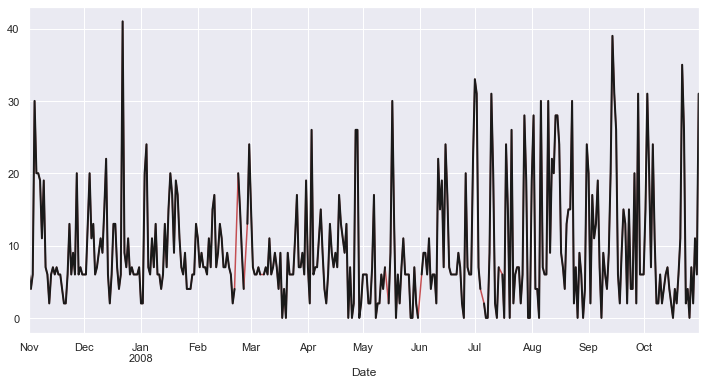

In [142]:
# This plot shows how linear interpolate will fix the data
fig, ax = plt.subplots(figsize=(12, 6))
# df['Sunshine'].plot(ax=ax)
# ax.set(title="AAPL daily closing price")
windsp_interp = df['WindSpeed9am'].interpolate('linear')
ax = windsp_interp.plot(c='r')
df['WindSpeed9am'].plot(c='k', ax=ax, lw=2)

In [143]:
df['Sunshine'] = df['Sunshine'].interpolate('linear')
df['WindGustSpeed'] = df['WindGustSpeed'].interpolate('linear')
df['WindSpeed9am'] = df['WindSpeed9am'].interpolate('linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 20 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         366 non-null float64
WindGustDir      366 non-null object
WindGustSpeed    366 non-null float64
WindSpeed9am     366 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(3)
memory usage: 60.0+ KB


In [79]:
# def percent_change(values):
#     """Calculates the % change between the last value
#     and the mean of previous values"""
#     # Separate the last value and all previous values into variables
#     previous_values = values[:-1]
#     last_value = values[-1]
#     # Calculate the % difference between the last value
#     # and the mean of earlier values
#     percent_change = (last_value - np.mean(previous_values)) \
#     / np.mean(previous_values)
#     return percent_change

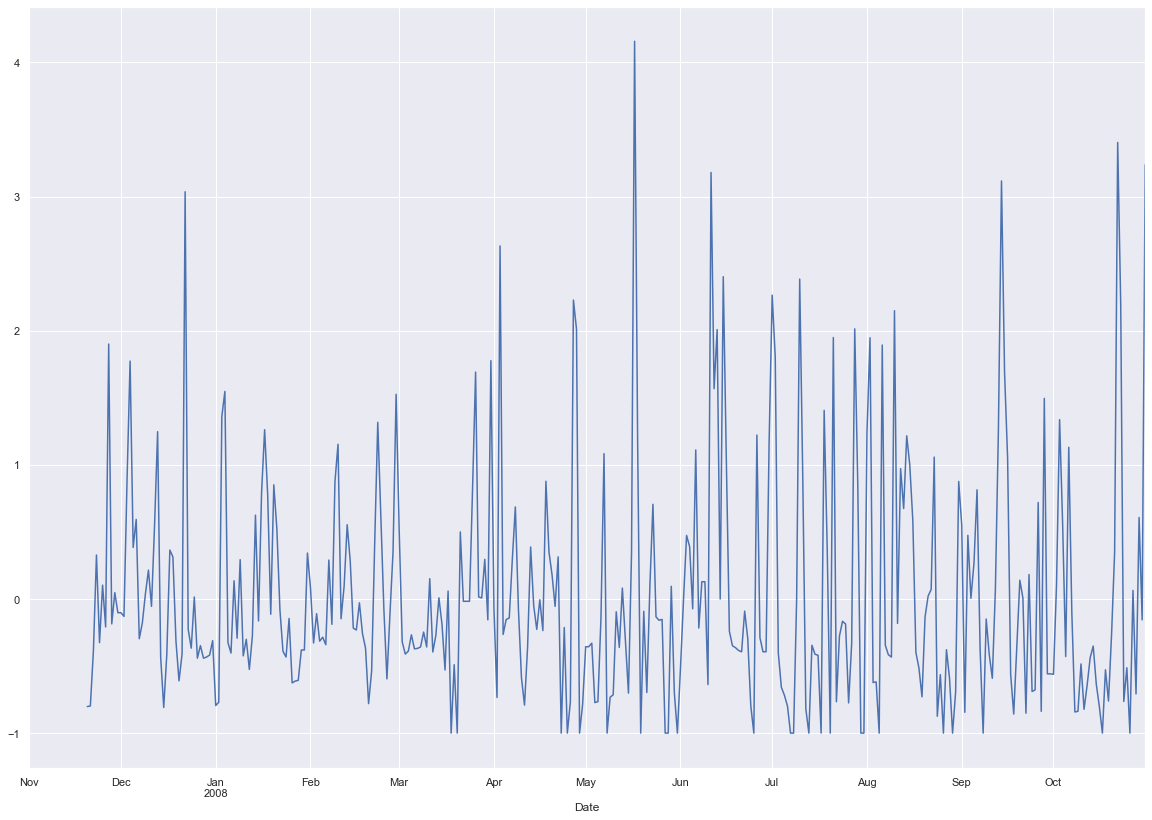

In [114]:
# ax = df['WindSpeed9am'].rolling(window=20).aggregate(percent_change).plot()
# # ax.legend_.set_visible(False)

In [42]:
# After printing, drop all the missing observations from df.
df = df.dropna(axis=0)
print("Number of rows where there is at least one feature missing is " + str(len(df[df.isnull().any(axis=1)])))

Number of rows where there is at least one feature missing is 0


In [ ]:
# df['Sunshine'].fillna(np.mean(df['Sunshine']), inplace=True)
# df['WindGustDir'].fillna(np.mean(df['Sunshine']), inplace=True)
# df['WindGustSpeed'].fillna(np.mean(df['Sunshine']), inplace=True)
# df['WindDir3pm'].fillna(np.mean(df['Sunshine']), inplace=True)
# df['WindSpeed9am'].fillna(np.mean(df['Sunshine']), inplace=True)

In [15]:
all_predictors = list(df.columns)
all_predictors.remove(all_predictors[-1])
all_predictors.remove(all_predictors[-1])
all_predictors

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

We would need to separate and prepare categorical and continuous variable seperately.

How is WindGustDir influencing RainTomorrow and RISK_MM?

How is WindDir9am and WindDir3pm related to each other?

How is WindGustDir and WindDir9am/3pm related?

If RainToday is Yes, then how likely would it rain tomorrow?
If RainToday is Yes and it did RainTomorrow, how much Rain would it be tomorrow?

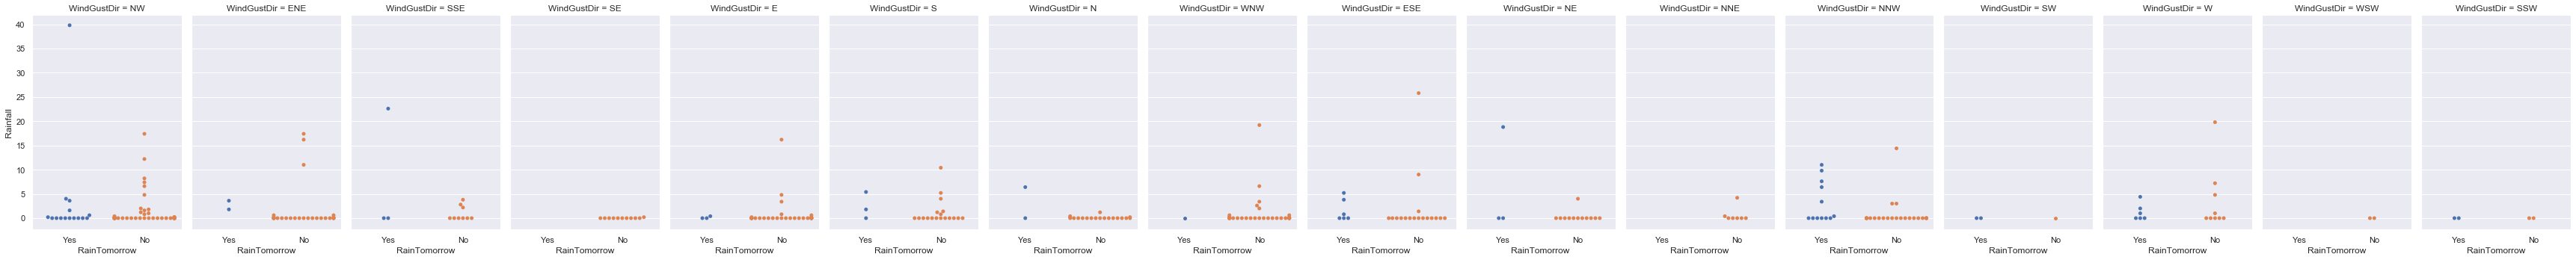

In [78]:
# # fig, ax = plt.subplots(figsize=(14, 6))
# sns.catplot(x="RainTomorrow", y="Rainfall",
#             col="WindGustDir", aspect=.6,
#             kind="swarm", order=['Yes', 'No'], data=df);
# # sns.catplot(ax=ax, x="RainTomorrow", y="RISK_MM", data=df, col='WindGustDir')

Given that it rained today, 
+ with a windGustDir of NW/ENE/, it is more likely to not rain tomorrow
+ with a windGustDir of SW/SSW/

In [24]:
num_predictors = df.select_dtypes(include=['float64', 'int64'])
num_predictors = num_predictors.columns
num_predictors

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

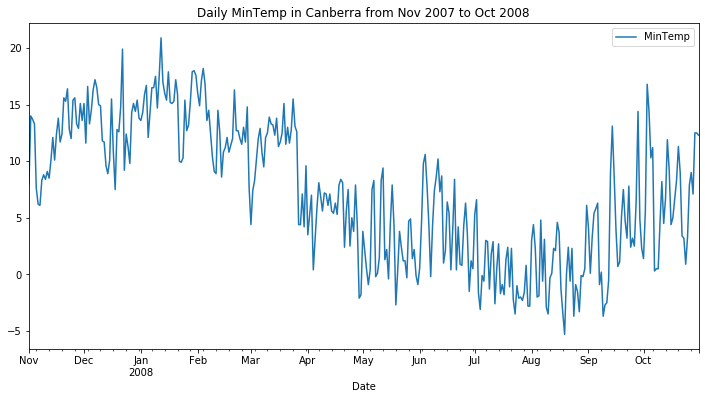

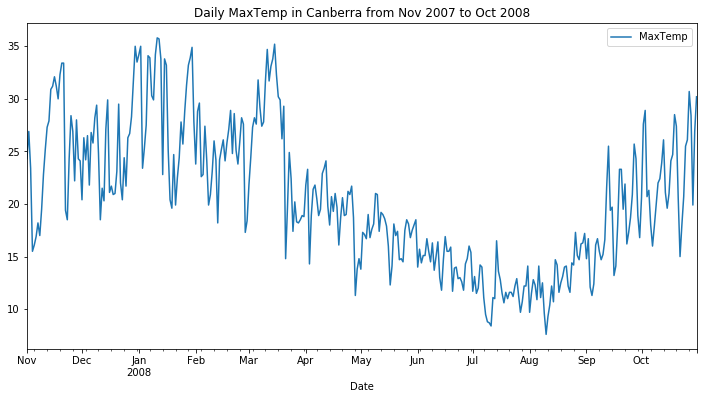

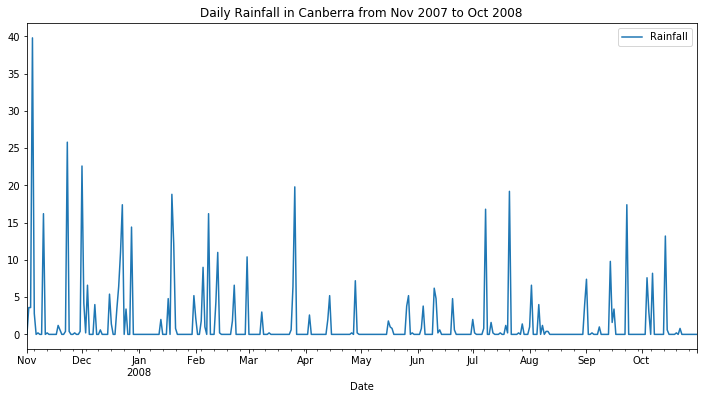

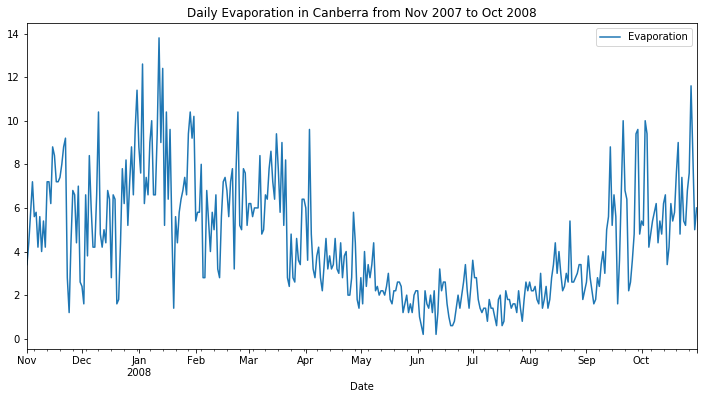

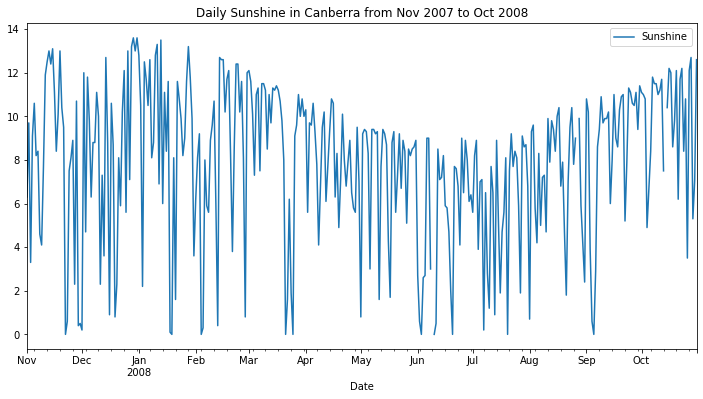

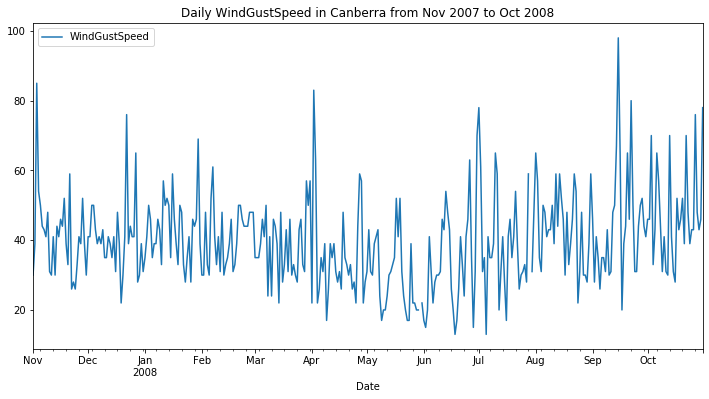

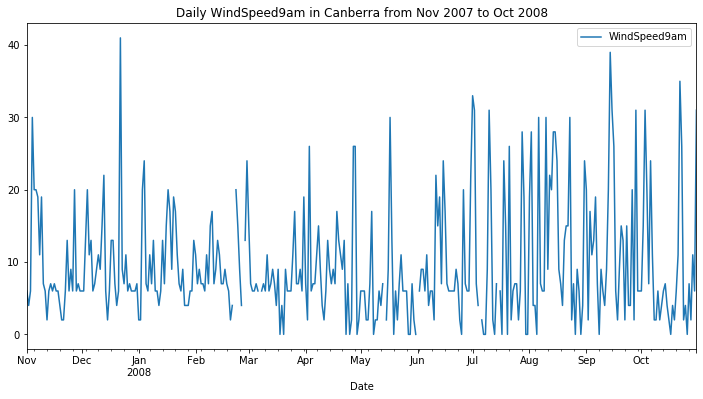

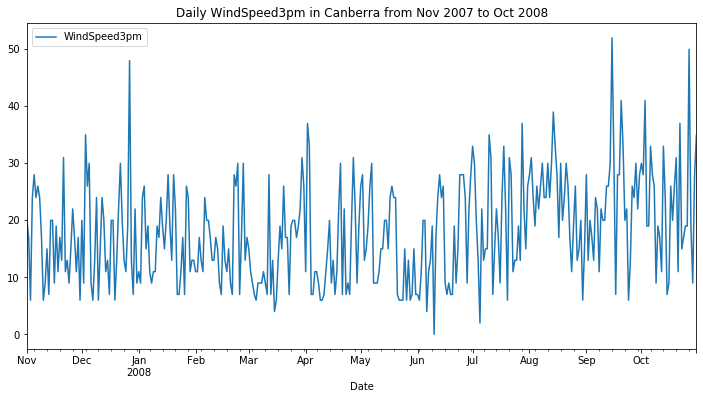

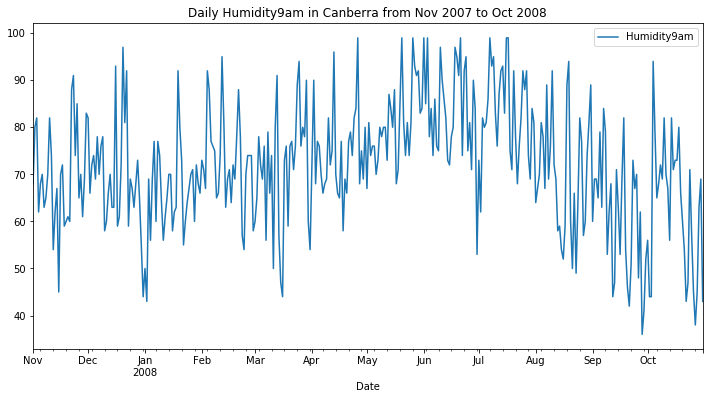

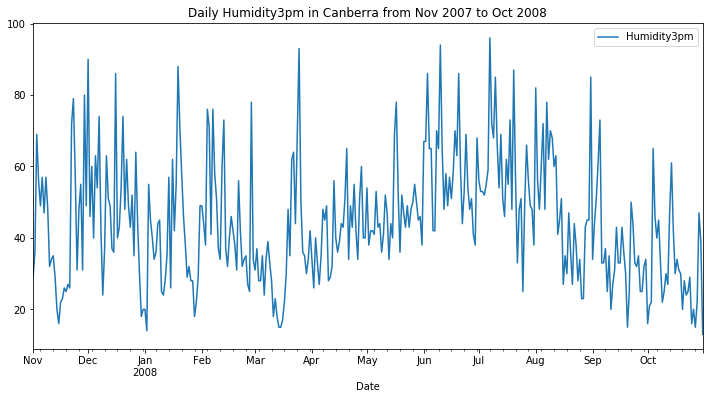

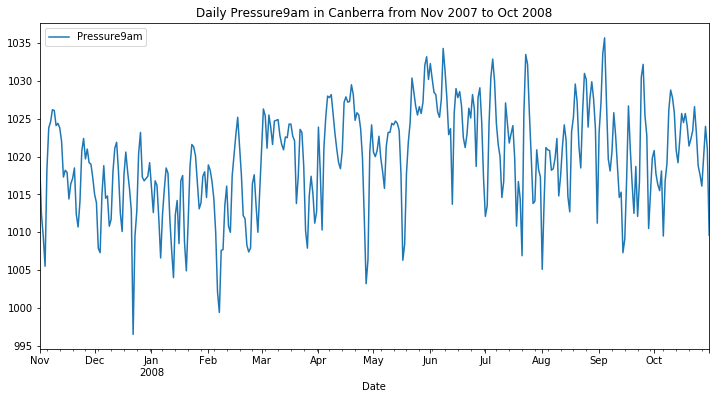

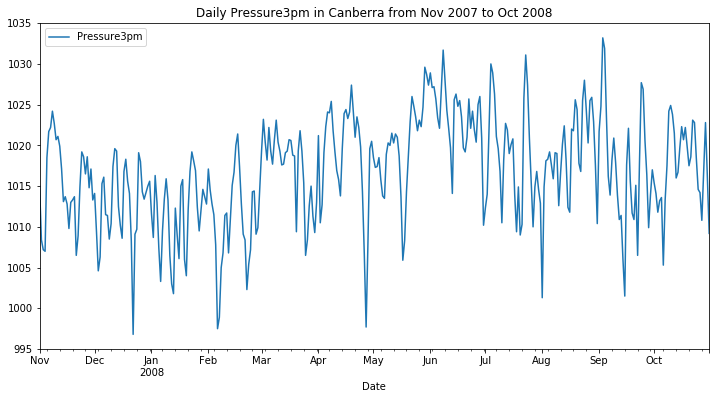

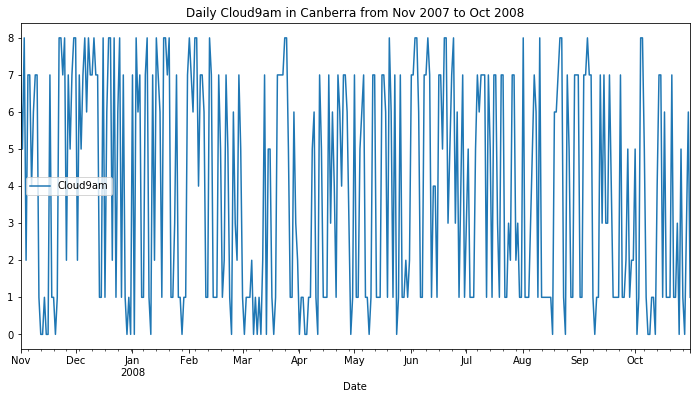

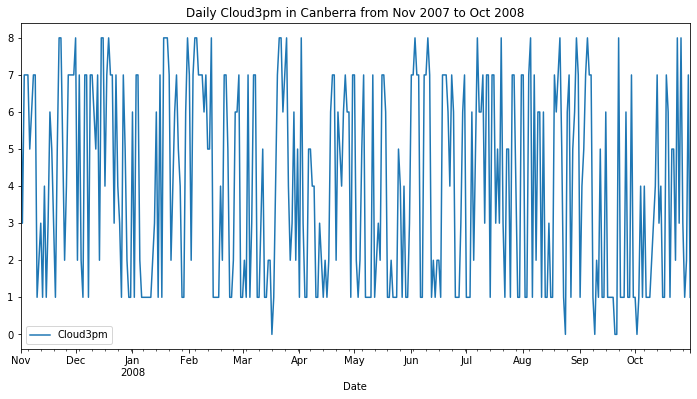

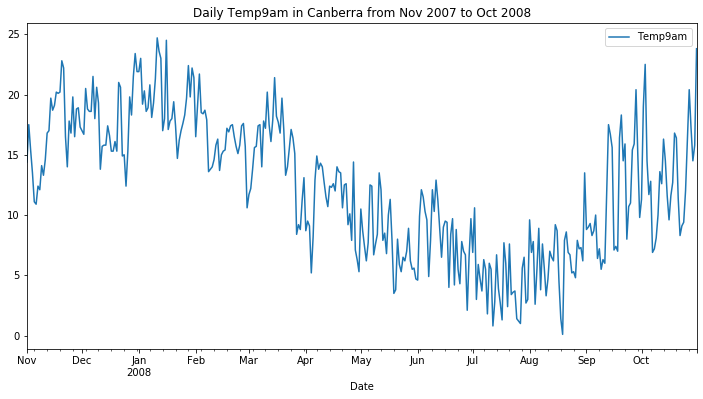

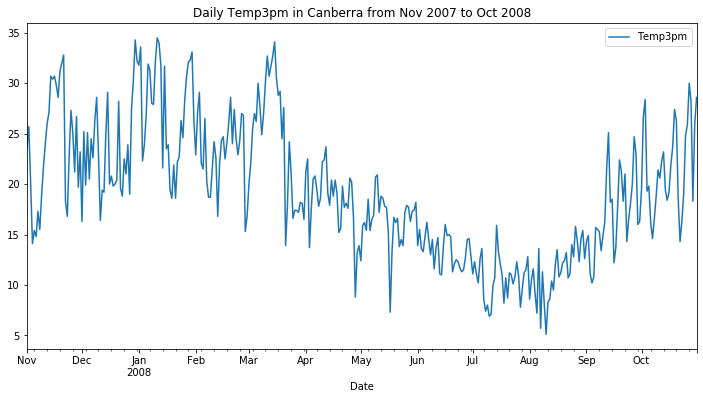

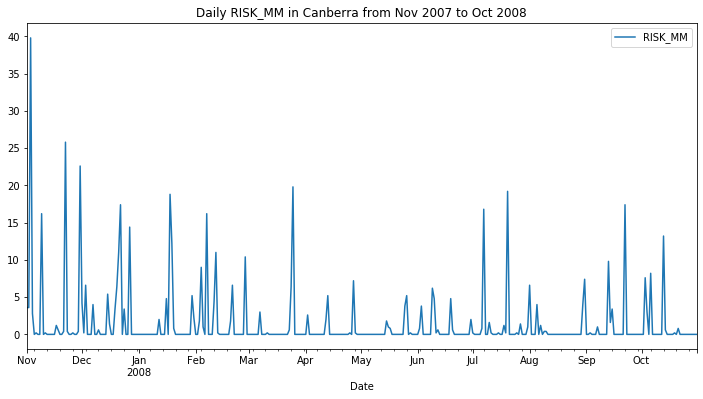

In [25]:
def plotAllColumns(columns):
    for col in columns:
        if col != 'Date':
            fig, ax = plt.subplots(figsize=(12, 6))
            df.plot('Date', col, ax=ax)
            ax.set(title="Daily " + col + " in Canberra from Nov 2007 to Oct 2008")
            plt.show()

# To plot using continuous variable.
plotAllColumns(num_predictors)

Hypotheses:

Some of the features may be correlated with each other:
+ `MinTemp` and `MaxTemp` (To take range or average)
+ `Sunshine` and `Evaporation`
+ `WindSpeed9am` and `WindSpeed3pm` (To take average)
+ `Humidity9am` and `Humidity3pm` (To take average)
+ `Pressure9am` and `Pressure3pm` (To take average)
+ `Cloud9am` and `Cloud3pm` (To take average)
+ `Temp9am` and `Temp3pm` (To take average)

To examine the collinearity between each continuous variable

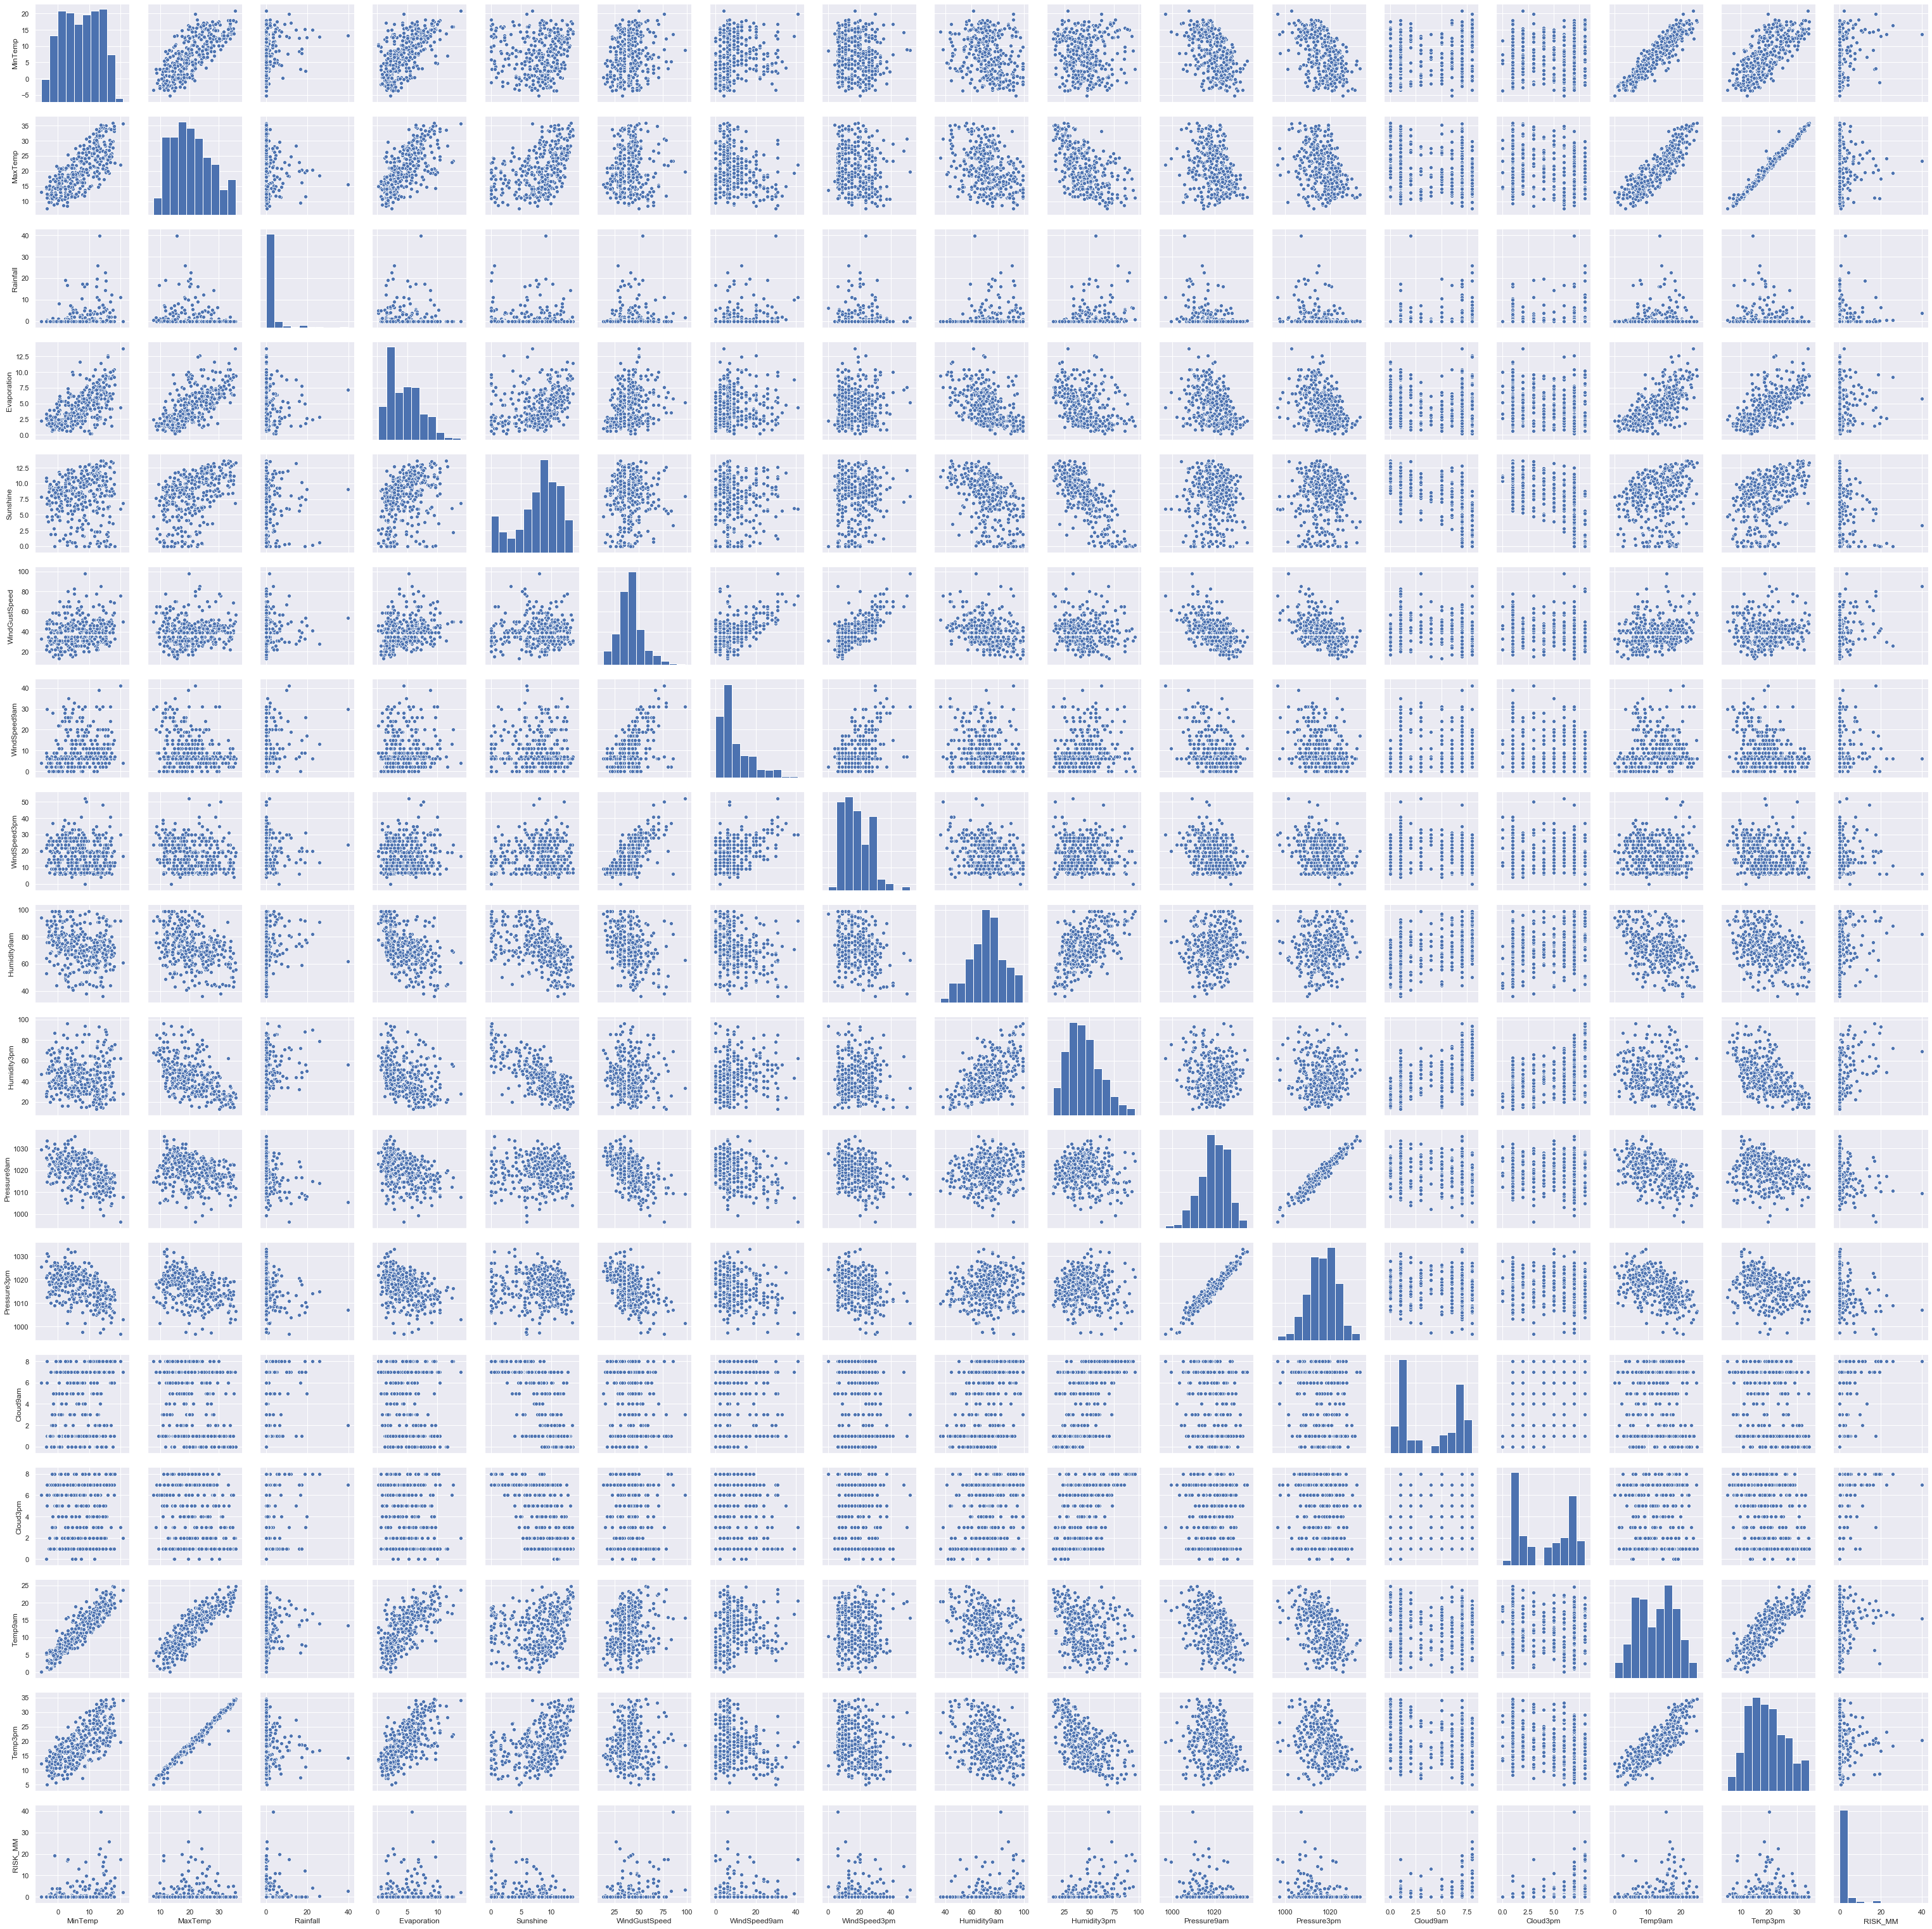

In [79]:
# scatterplot matrix.
sns.pairplot(df[num_predictors])

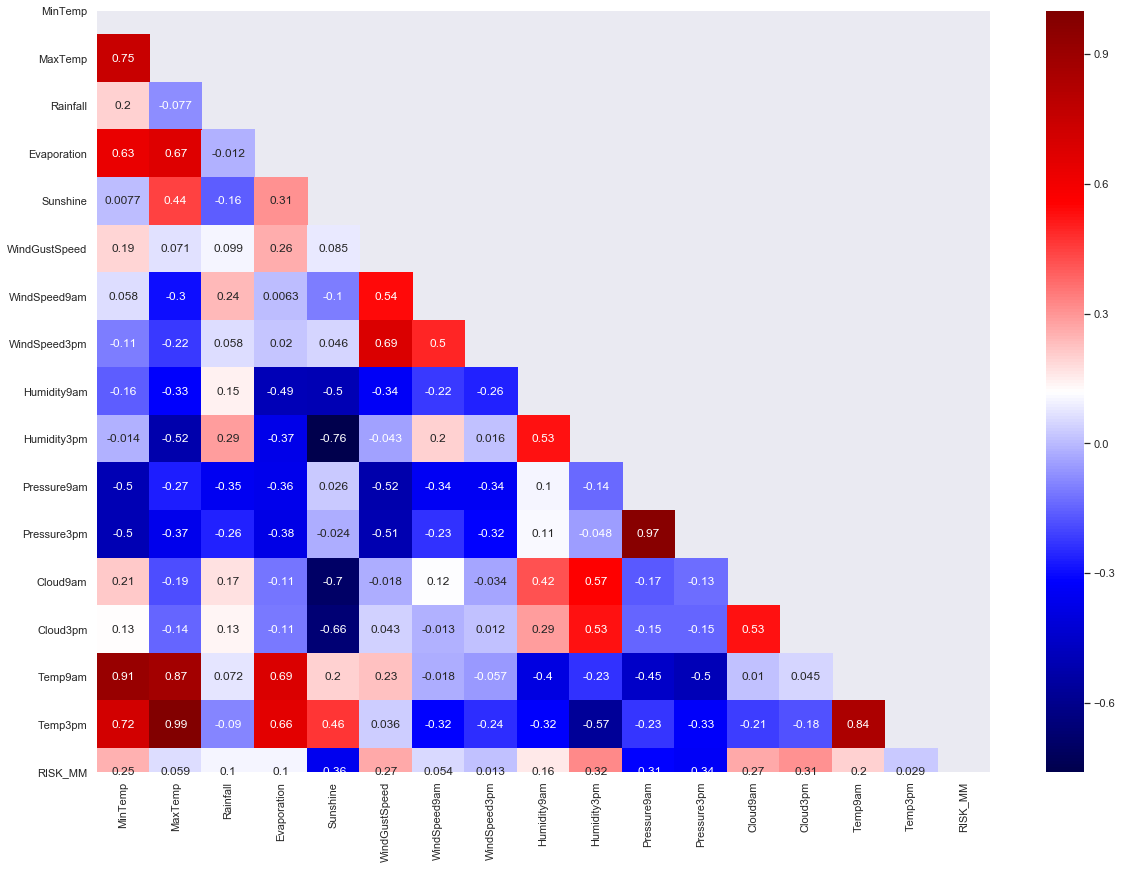

In [44]:
# heatmap
correlation_matrix = df[num_predictors].corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(20,14)})
sns.heatmap(data=correlation_matrix, mask=mask, cmap='seismic',annot=True)

In [29]:
sort_cm = correlation_matrix.unstack()
sort_cm = sort_cm.sort_values(kind="quicksort")
sort_cm

Sunshine     Humidity3pm   -0.759429
Humidity3pm  Sunshine      -0.759429
Cloud9am     Sunshine      -0.681092
Sunshine     Cloud9am      -0.681092
             Cloud3pm      -0.661131
                              ...   
Evaporation  Evaporation    1.000000
Rainfall     Rainfall       1.000000
MaxTemp      MaxTemp        1.000000
Temp3pm      Temp3pm        1.000000
RISK_MM      RISK_MM        1.000000
Length: 289, dtype: float64

In [30]:
# These are the very highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm > 0.95) | (sort_cm[sort_cm < -0.95])) & sort_cm[sort_cm != 1]]

Pressure3pm  Pressure9am    0.967895
Pressure9am  Pressure3pm    0.967895
Temp3pm      MaxTemp        0.989261
MaxTemp      Temp3pm        0.989261
dtype: float64

In [31]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm >= 0.8) & (sort_cm < 0.95) | (sort_cm <= -0.8) & (sort_cm[sort_cm > -0.95])) & sort_cm[sort_cm != 1]]

Temp9am  Temp3pm    0.844406
Temp3pm  Temp9am    0.844406
Temp9am  MaxTemp    0.870604
MaxTemp  Temp9am    0.870604
Temp9am  MinTemp    0.916745
MinTemp  Temp9am    0.916745
dtype: float64

In [34]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm >= 0.4) & (sort_cm < 0.8))]

Sunshine       MaxTemp          0.452064
MaxTemp        Sunshine         0.452064
Temp3pm        Sunshine         0.470447
Sunshine       Temp3pm          0.470447
WindSpeed9am   WindSpeed3pm     0.472966
WindSpeed3pm   WindSpeed9am     0.472966
Humidity3pm    Cloud3pm         0.510108
Cloud3pm       Humidity3pm      0.510108
               Cloud9am         0.525218
Cloud9am       Cloud3pm         0.525218
WindGustSpeed  WindSpeed9am     0.527653
WindSpeed9am   WindGustSpeed    0.527653
Humidity9am    Humidity3pm      0.546718
Humidity3pm    Humidity9am      0.546718
               Cloud9am         0.551633
Cloud9am       Humidity3pm      0.551633
MinTemp        Evaporation      0.649930
Evaporation    MinTemp          0.649930
Temp3pm        Evaporation      0.671632
Evaporation    Temp3pm          0.671632
MaxTemp        Evaporation      0.690026
Evaporation    MaxTemp          0.690026
WindGustSpeed  WindSpeed3pm     0.693945
WindSpeed3pm   WindGustSpeed    0.693945
Temp9am        E

In [33]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm <= -0.4) & (sort_cm[sort_cm > -0.8]))]

Sunshine       Humidity3pm     -0.759429
Humidity3pm    Sunshine        -0.759429
Cloud9am       Sunshine        -0.681092
Sunshine       Cloud9am        -0.681092
               Cloud3pm        -0.661131
Cloud3pm       Sunshine        -0.661131
Humidity3pm    Temp3pm         -0.581676
Temp3pm        Humidity3pm     -0.581676
Pressure9am    WindGustSpeed   -0.540180
WindGustSpeed  Pressure9am     -0.540180
MaxTemp        Humidity3pm     -0.533327
Humidity3pm    MaxTemp         -0.533327
Pressure3pm    WindGustSpeed   -0.526885
WindGustSpeed  Pressure3pm     -0.526885
Evaporation    Humidity9am     -0.519587
Humidity9am    Evaporation     -0.519587
MinTemp        Pressure9am     -0.501707
Pressure9am    MinTemp         -0.501707
Humidity9am    Sunshine        -0.499017
Sunshine       Humidity9am     -0.499017
MinTemp        Pressure3pm     -0.498007
Pressure3pm    MinTemp         -0.498007
Temp9am        Pressure3pm     -0.492636
Pressure3pm    Temp9am         -0.492636
Temp9am        P

In [81]:
sorted_cm = sort_cm.reset_index()
# sorted_cm.columns
sorted_cm[sorted_cm['level_0'] == 'RISK_MM'].sort_values(by=0, ascending=False)

level_0        level_1         0
288  RISK_MM        RISK_MM  1.000000
228  RISK_MM    Humidity3pm  0.361397
226  RISK_MM       Cloud3pm  0.325726
218  RISK_MM       Cloud9am  0.274909
214  RISK_MM  WindGustSpeed  0.253416
208  RISK_MM        MinTemp  0.217102
198  RISK_MM    Humidity9am  0.174293
195  RISK_MM        Temp9am  0.161768
177  RISK_MM       Rainfall  0.092780
169  RISK_MM    Evaporation  0.075038
152  RISK_MM   WindSpeed9am  0.040056
145  RISK_MM        MaxTemp  0.025403
136  RISK_MM        Temp3pm -0.007561
134  RISK_MM   WindSpeed3pm -0.009718
57   RISK_MM    Pressure9am -0.300137
52   RISK_MM    Pressure3pm -0.323349
30   RISK_MM       Sunshine -0.382389

#### Feature Selection and Engineering

Most of the predictors have low collinearity with RISK_MM. To test out with linear regression model first

In [ ]:
# To plot two in one - Rainfall and RISK MM, Min and Max Temp, Sunshine and Evaporation


In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression


In [83]:
# fit simple linear regression models (using the statsmodels package), 
# for each of the numerical predictor variables

models = {}
isSignificant = {}
maxR2Predictor = {}

for col in df[num_predictors].dropna():
    if col != 'RISK_MM':
        X = df[[col]]
        y = df[['RISK_MM']]
        lin = sm.OLS(y, sm.add_constant(X)).fit()
        
        if round(lin.pvalues[col],3) <= 0.05:
            isSignificant[col] = True
        
        maxR2Predictor[col] = lin.rsquared
        models[col] = lin
        print("=================================================")
        print(col)
        print("Coefficient of predictor: " + str(round(lin.params[col], 3)))
        print("Standard deviation of predictor: " + str(round(lin.bse[col],3)))
        print("P-value of predictor: " + str(round(lin.pvalues[col],3)))
        print("=================================================\n")        


MinTemp
Coefficient of predictor: 0.155
Standard deviation of predictor: 0.037
P-value of predictor: 0.0

MaxTemp
Coefficient of predictor: 0.016
Standard deviation of predictor: 0.034
P-value of predictor: 0.634

Rainfall
Coefficient of predictor: 0.094
Standard deviation of predictor: 0.054
P-value of predictor: 0.082

Evaporation
Coefficient of predictor: 0.121
Standard deviation of predictor: 0.086
P-value of predictor: 0.159

Sunshine
Coefficient of predictor: -0.466
Standard deviation of predictor: 0.06
P-value of predictor: 0.0

WindGustSpeed
Coefficient of predictor: 0.083
Standard deviation of predictor: 0.017
P-value of predictor: 0.0

WindSpeed9am
Coefficient of predictor: 0.022
Standard deviation of predictor: 0.029
P-value of predictor: 0.453

WindSpeed3pm
Coefficient of predictor: -0.005
Standard deviation of predictor: 0.026
P-value of predictor: 0.856

Humidity9am
Coefficient of predictor: 0.057
Standard deviation of predictor: 0.017
P-value of predictor: 0.001

Humidit

In [84]:
ans = "Using p-value, when p-value of predictor variable is <= 0.05, it is statistically significant.\n\nThose predictor variable who has a statistically significant association with the response variable are: "

count = 0
for predictor in isSignificant.keys():
    if count == len(isSignificant.keys()) - 1:
        ans += predictor + "."
    else:
        ans += predictor + " , "
    count += 1
    
print(ans)

Using p-value, when p-value of predictor variable is <= 0.05, it is statistically significant.

Those predictor variable who has a statistically significant association with the response variable are: MinTemp , Sunshine , WindGustSpeed , Humidity9am , Humidity3pm , Pressure9am , Pressure3pm , Cloud9am , Cloud3pm , Temp9am.


In [105]:
lin_df = pd.DataFrame({'Models': models, 'isSignificant': isSignificant, 'Rsquared': maxR2Predictor})
lin_df['isSignificant'] = lin_df['isSignificant'].fillna(False)
lin_df.sort_values(by='Rsquared', ascending=False)

Models  \
Sunshine       <statsmodels.regression.linear_model.Regressio...   
Humidity3pm    <statsmodels.regression.linear_model.Regressio...   
Cloud3pm       <statsmodels.regression.linear_model.Regressio...   
Pressure3pm    <statsmodels.regression.linear_model.Regressio...   
Pressure9am    <statsmodels.regression.linear_model.Regressio...   
Cloud9am       <statsmodels.regression.linear_model.Regressio...   
WindGustSpeed  <statsmodels.regression.linear_model.Regressio...   
MinTemp        <statsmodels.regression.linear_model.Regressio...   
Humidity9am    <statsmodels.regression.linear_model.Regressio...   
Temp9am        <statsmodels.regression.linear_model.Regressio...   
Rainfall       <statsmodels.regression.linear_model.Regressio...   
Evaporation    <statsmodels.regression.linear_model.Regressio...   
WindSpeed9am   <statsmodels.regression.linear_model.Regressio...   
MaxTemp        <statsmodels.regression.linear_model.Regressio...   
WindSpeed3pm   <statsmodels.regression.linear_model.Regressio...   
Temp3pm        <statsmodels.regression.linear_model.Regressio...   

               isSignificant  Rsquared  
Sunshine                True  0.146221  
Humidity3pm             True  0.130607  
Cloud3pm                True  0.106097  
Pressure3pm             True  0.104555  
Pressure9am             True  0.090082  
Cloud9am                True  0.075575  
WindGustSpeed           True  0.064219  
MinTemp                 True  0.047133  
Humidity9am             True  0.030378  
Temp9am                 True  0.026169  
Rainfall               False  0.008608  
Evaporation            False  0.005631  
WindSpeed9am           False  0.001604  
MaxTemp                False  0.000645  
WindSpeed3pm           False  0.000094  
Temp3pm                False  0.000057

In [116]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]

y = df[['RISK_MM']]

In [117]:
len(X.columns)

16

In [118]:
multlin = ols(formula='RISK_MM ~'+ ' + '.join(X.columns), data=df).fit()
print(multlin.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     13.84
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           1.74e-28
Time:                        15:47:20   Log-Likelihood:                -924.95
No. Observations:                 353   AIC:                             1884.
Df Residuals:                     336   BIC:                             1950.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       113.8050     42.342      2.688

With all the 16 continuous predictors, we achieved an adjusted R squared of 0.368. The summary indicated possible multicollinearity problems, so we will remove one of those predictors with high collinearity:

Between 
+ Pressure3pm & Pressure9am
+ Temp3pm & MaxTemp     


In [111]:
# Remove 'Pressure 3pm' and 'Temp 3pm'
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
       'Temp9am']]
y = df[['RISK_MM']]


In [112]:
multlin = ols(formula='RISK_MM ~'+ ' + '.join(X.columns), data=df).fit()
print(multlin.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     14.66
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           1.69e-27
Time:                        15:43:55   Log-Likelihood:                -930.54
No. Observations:                 353   AIC:                             1891.
Df Residuals:                     338   BIC:                             1949.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        89.2581     42.213      2.114

With removal of the predictors, the adjusted R-Squared drops to 0.352 which is not desireable. Thus, we need to do some feature engineering to improve the model performance and to consider adding some categorical variables which may have interation with the other predictors.

In [125]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'WindGustDir', 'RainToday']]
y = df[['RISK_MM']]

In [126]:
X_encoded = pd.get_dummies(X)
X_encoded

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindGustDir_S  \
0             6.0            20           68           29  ...              0   
1             4.0            17           80           36  ...              0   
2             6.0             6           82           69  ...              0   
3            30.0            24           62           56  ...              0   
4            20.0            28           68           49  ...              0   
..            ...           ...          ...          ...  ...            ...   
361           7.0            50           38           15  ...              0   
362           2.0            19           45           22  ...              0   
363          11.0             9           63           47  ...              0   
364           6.0            28           69           39  ...              0   
365          31.0            35           43           13  ...              0   

     WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  \
0                 0                0                0               0   
1                 0                0                0               0   
2                 0                0                0               0   
3                 0                0                0               0   
4                 0                1                0               0   
..              ...              ...              ...             ...   
361               0                0                0               0   
362               0                0                0               0   
363               0                0                0               0   
364               0                0                0               0   
365               0                0                0               0   

     WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  RainToday_No  \
0                0                0                0             1   
1                0                0                0             0   
2                0                0                0             0   
3                0                0                0             0   
4                0                0                0             0   
..             ...              ...              ...           ...   
361              0                0                0             1   
362              0                0                0             1   
363              0                0                0             1   
364              0                0                0             1   
365              0                0                0             1   

     RainToday_Yes  
0                0  
1                1  
2                1  
3                1  
4                1  
..             ...  
361              0  
362              0  
363              0  
364              0  
365              0  

[353 rows x 32 columns]

In [129]:
multlin = ols(formula='RISK_MM ~'+ ' + '.join(X_encoded.columns), data=pd.get_dummies(df)).fit()
print(multlin.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     7.744
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           1.04e-23
Time:                        15:56:35   Log-Likelihood:                -918.41
No. Observations:                 353   AIC:                             1899.
Df Residuals:                     322   BIC:                             2019.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          40.0819     28.157     

Did not surpass previous adjusted R-Squaredd of 0.368 with adjusted R-squared of 0.365

In [130]:
X_encoded_columns = ['Sunshine', 'WindSpeed3pm', 'Humidity3pm','Temp9am', 'WindGustDir_N', 'WindGustDir_NNW', 'WindGustDir_SSW']

multlin = ols(formula='RISK_MM ~'+ ' + '.join(X_encoded_columns), data=pd.get_dummies(df)).fit()
print(multlin.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.40
Date:                Tue, 31 Dec 2019   Prob (F-statistic):           9.84e-20
Time:                        16:03:15   Log-Likelihood:                -960.93
No. Observations:                 353   AIC:                             1938.
Df Residuals:                     345   BIC:                             1969.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.6678      1.558     